In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.datasets import mnist
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
np.random.seed(10)
from keras.layers import Flatten,Conv2D,MaxPooling2D
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' #过滤警告错误

Using TensorFlow backend.


# 使用全连接层方法

In [2]:
model = Sequential()
model.add(Dense(1024,
                input_shape=(784,),
                activation = 'tanh'))  # 输入层， 28*28=784，有1024个神经元，设置输入shape为784行 1列
model.add(Dropout(0.5))  # 50% dropout
 
model.add(Dense(512,
                activation = 'tanh'))  # 隐藏层， 512

model.add(Dropout(0.5)) # 50% dropout
 
model.add(Dense(10,
                activation = 'softmax'))  # 输出结果， 10

In [3]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)  # 设定学习效率等参数
model.compile(loss = 'categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])  # 使用交叉熵作为loss

In [4]:
(x_train,y_train),(x_test,y_test) = mnist.load_data() #使用mnist读取数据（第一次需要下载）

In [5]:
X_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])  #第一个参数为batch
X_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])
 
Y_train = (np.arange(10) == y_train[:,None]).astype(int)  # 将index转换橙一个one_hot矩阵
Y_test = (np.arange(10) == y_test[:,None]).astype(int)

In [6]:
Y_test

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [7]:
# 开始训练
# batch_size表示每个训练块包含的数据个数，epochs表示训练的次数，shuffle表示是否每次训练后将batch打乱重
# 排，verbose表示是否输出进度log，validation_split指定验证集占比
train_history = model.fit(X_train, Y_train, batch_size=200, epochs=10, shuffle=True, verbose=1, validation_split=0.3)



Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 2s 42us/step - loss: 1.0757 - accuracy: 0.6353 - val_loss: 0.4825 - val_accuracy: 0.8496
Epoch 2/10
42000/42000 [==============================] - 1s 24us/step - loss: 0.8284 - accuracy: 0.7236 - val_loss: 0.4307 - val_accuracy: 0.8706
Epoch 3/10
42000/42000 [==============================] - 1s 23us/step - loss: 0.7376 - accuracy: 0.7537 - val_loss: 0.4005 - val_accuracy: 0.8813
Epoch 4/10
42000/42000 [==============================] - 1s 23us/step - loss: 0.7072 - accuracy: 0.7675 - val_loss: 0.4072 - val_accuracy: 0.8767
Epoch 5/10
42000/42000 [==============================] - 1s 23us/step - loss: 0.6809 - accuracy: 0.7760 - val_loss: 0.3612 - val_accuracy: 0.8919
Epoch 6/10
42000/42000 [==============================] - 1s 23us/step - loss: 0.6481 - accuracy: 0.7869 - val_loss: 0.3512 - val_accuracy: 0.8954
Epoch 7/10
42000/42000 [==============================] - 1s 23us/s

In [8]:
# 开始预测

result = model.predict(X_test,batch_size=200,verbose=1)
 
result_max = np.argmax(result, axis = 1)  #取每行中最大的值所对应的索引，即是概率最大的标签
test_max = np.argmax(Y_test, axis = 1)  #取真实label
 
result_bool = np.equal(result_max, test_max)  #比对是否正确
true_num = np.sum(result_bool)
print("")
print("The accuracy of the model is %f" % (true_num/len(result_bool)))

10000/10000 [==============================] - 0s 8us/step

The accuracy of the model is 0.905600


In [9]:
result_bool

array([ True,  True,  True, ...,  True,  True,  True])

In [10]:
result_max

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [11]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [12]:
train_history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

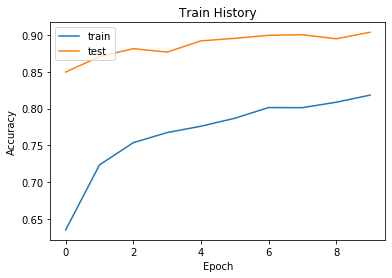

In [13]:
show_train_history('accuracy','val_accuracy')

评估模型的准确率

In [14]:
print("test set")
scores = model.evaluate(X_test,Y_test,batch_size=200,verbose=1)
print("")
print("The test loss is %f" % scores[0])

test set
10000/10000 [==============================] - 0s 11us/step

The test loss is 0.302404


预测结果

In [15]:
prediction=model.predict_classes(X_test)

In [16]:
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9], dtype=int64)

# 使用卷积层方法

In [17]:
(x_train, y_train),(x_test,y_test) = mnist.load_data() #读取MNIST资料

In [18]:
#将features（数字影像特征值）以reshape转换为6000*28*28*1的4维矩阵
x_train4D = x_train.reshape(x_train.shape[0],28,28,1).astype('float32')
x_test4D = x_test.reshape(x_test.shape[0],28,28,1).astype('float32')

In [19]:
#将features标准化，可以提高模型预测的准确度，并且更快收敛
x_train4D_normalize = x_train4D / 255
x_test4D_normalize = x_test4D / 255

In [20]:
#使用np_utils.to_categorical, 将训练资料集与测试的label,进行 Onehot encoding 转换
y_trainOneHot = np_utils.to_categorical(y_train)
y_testOneHot = np_utils.to_categorical(y_test)

In [21]:
#建立keras的Sequential模型（线性堆积模型），后续只需要使用model.add()方法，将各神经网络层加入模型即可
model = Sequential()
#建立卷积层1.
#输入的数字影像是28*28大小，执行第一次卷积运算，会产生16个卷积核，卷积运算并不会改变影像大小，所以仍然是28*28大小。
model.add(Conv2D(filters=16,
                kernel_size=(5,5),
                padding='same',#补零
                input_shape=(28,28,1),
                activation='relu'))

#建立池化层
#输入参数pool_size=(2,2),执行第一次缩减取样，将16个28*28影像，缩小为16个14*14的影像。
model.add(MaxPooling2D(pool_size=(2,2)))

#建立卷积层2.
#输入的数字影像是28*28大小，执行第2次卷积运算，将原本16个的影像，转换为36个影像，卷积运算并不会改变影像大小，所以仍然是14*14大小。
model.add(Conv2D(filters=36,
                kernel_size=(5,5),
                padding='same',#补零
                activation='relu'))

#建立池化层2
#输入参数pool_size=(2,2),执行第2次缩减取样，将36个14*14影像，缩小为36个7*7的影像。
model.add(MaxPooling2D(pool_size=(2,2)))

#加入Dropout(0.25)层至模型中。其功能是，每次训练迭代时，会随机的在神经网络中放弃25%的神经元，以避免overfitting。
model.add(Dropout(0.25))

#建立平坦层
#之前的步骤已经建立池化层2，共有36个7*7影像，转换为1维的向量，长度是36*7*7=1764，也就是1764个float数字，正好对应到1764个神经元。
model.add(Flatten())

#建立隐藏层，共有128个神经元
model.add(Dense(128,activation='relu'))

#加入Dropout(0.5)层至模型中。其功能是，每次训练迭代时，会随机的在神经网络中放弃50%的神经元，以避免overfitting。
model.add(Dropout(0.5))

#建立输出层
#共有10个神经元，对应到0-9共10个数字。并且使用softmax激活函数进行转换，softmax可以将神经元的输出，转换为预测每一个数字的几率。
model.add(Dense(10,activation='softmax'))

In [22]:
#查看模型的摘要
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

In [23]:
#进行训练
#定义训练方式
#在模型训练之前，我们必须使用compile方法，对训练模型进行设定
model.compile(loss='categorical_crossentropy',
             optimizer='adam',metrics=['accuracy'])  #将metrics设为accuracy

In [24]:
#开始训练
train_history = model.fit(x=x_train4D_normalize,
                       y=y_trainOneHot,validation_split=0.2,
                       epochs=10,batch_size=300,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 4s - loss: 0.4820 - accuracy: 0.8486 - val_loss: 0.0951 - val_accuracy: 0.9731
Epoch 2/10
 - 2s - loss: 0.1300 - accuracy: 0.9613 - val_loss: 0.0625 - val_accuracy: 0.9803
Epoch 3/10
 - 2s - loss: 0.0967 - accuracy: 0.9717 - val_loss: 0.0551 - val_accuracy: 0.9841
Epoch 4/10
 - 2s - loss: 0.0782 - accuracy: 0.9764 - val_loss: 0.0468 - val_accuracy: 0.9858
Epoch 5/10
 - 2s - loss: 0.0638 - accuracy: 0.9807 - val_loss: 0.0395 - val_accuracy: 0.9885
Epoch 6/10
 - 2s - loss: 0.0594 - accuracy: 0.9819 - val_loss: 0.0433 - val_accuracy: 0.9880
Epoch 7/10
 - 2s - loss: 0.0503 - accuracy: 0.9846 - val_loss: 0.0348 - val_accuracy: 0.9900
Epoch 8/10
 - 2s - loss: 0.0492 - accuracy: 0.9852 - val_loss: 0.0350 - val_accuracy: 0.9898
Epoch 9/10
 - 2s - loss: 0.0426 - accuracy: 0.9871 - val_loss: 0.0333 - val_accuracy: 0.9902
Epoch 10/10
 - 2s - loss: 0.0391 - accuracy: 0.9877 - val_loss: 0.0334 - val_accuracy: 0.9908


In [25]:
#画图
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [26]:
train_history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

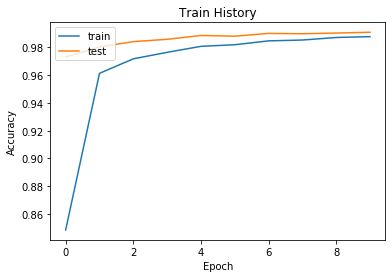

In [27]:
show_train_history('accuracy','val_accuracy')

评估模型的准确率

In [28]:
print("test set")
scores = model.evaluate(x_test4D_normalize , y_testOneHot)
print("")
print("The test loss is %f" % scores[0])

test set
10000/10000 [==============================] - 1s 60us/step

The test loss is 0.026383


预测结果

In [29]:
prediction=model.predict_classes(x_test4D_normalize)

In [30]:
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

## 通过对比loss与acc发现，使用卷积层的方法比使用全连接层的方法准确率高 10% 左右，在mnist数据集处理上，使用卷积进行处理比使用全连接方法处理更有效！